<a href="https://colab.research.google.com/github/plaban1981/MLflow/blob/main/MLFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction to ML flow

* install mlflow

* install databricks

*  It prompts you to enter your databricks account’s username and password 

## Setting up a free MLflow tracking server on databricks to use with Google Colab

In [4]:
!pip install mlflow
!databricks configure --host https://community.cloud.databricks.com/

     |████████████████████████████████| 14.6 MB 5.2 MB/s 
     |████████████████████████████████| 1.1 MB 59.8 MB/s 
     |████████████████████████████████| 180 kB 60.6 MB/s 
     |████████████████████████████████| 145 kB 63.7 MB/s 
     |████████████████████████████████| 636 kB 62.7 MB/s 
     |████████████████████████████████| 56 kB 5.7 MB/s 
     |████████████████████████████████| 79 kB 10.1 MB/s 
     |████████████████████████████████| 75 kB 4.9 MB/s 
     |████████████████████████████████| 52 kB 2.0 MB/s 
     |████████████████████████████████| 63 kB 2.5 MB/s 
  Created wheel for alembic: filename=alembic-1.4.1-py2.py3-none-any.whl size=158172 sha256=8341aea357700816e4372cc8284d0095cce826a6838c07ab62453d41e96a8e17
  Stored in directory: /root/.cache/pip/wheels/be/5d/0a/9e13f53f4f5dfb67cd8d245bb7cdffe12f135846f491a283e3
  Created wheel for databricks-cli: filename=databricks_cli-0.15.0-py3-none-any.whl size=105260 sha256=b3b2752bcc3371e017068b86fd61ca4637c47d3bd3b29f877df3ada6986e7c

## Log to Databricks Community Edition

In [5]:
import mlflow
import mlflow.xgboost
mlflow.set_tracking_uri("databricks")
mlflow.set_experiment("/Users/nayakpplaban@gmail.com/MLflowDemo")

## MLflow’s Python APIs for the classification task.

The following are the functions :

* **mlflow.start_run()** : It is used to start a new run ( a session ) within an experiment ( collection of runs ).

* **mlflow.log_param(key, value)** : It is used to log a key-value pair. key being a hyperparameter name or any parameter’s name.

* **mlflow.sklearn.autolog()** : It automatically logs hyperparameters of the estimator (classifier) that we are using, and once the training is completed, it logs the computed metrics on the entire training set and also saves the trained model.

* **mlflow.sklearn.eval_and_log_metrics(model, X_test, y_test, prefix='val_')** : It evaluates the model on the test set and logs the computed metrics.

* **mlflow.sklearn.load_model()** : It loads a saved model, given the run_id (id given to a run) and the name with which the model was saved.

* **mlflow.end_run()** : It is used to end a current run.

In [14]:
import xgboost
print(xgboost.__version__)

0.90


In [20]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

data = load_iris()
X, y = data.data, data.target
seed = 42 #Specify a seed value.

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = seed, stratify = y)
mlflow.autolog()

2021/09/30 12:45:49 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.


In [21]:
current_run = mlflow.start_run()
#Logging the seed value to passed to the train_test_split function. 
mlflow.log_param("seed", seed)
mlflow.log_param("dataset  Size", X.shape)
mlflow.log_param("test_size", X_test.shape)
mlflow.log_param("random_state", seed)


estimators = int(input("Estimator(s): "))
mlflow.log_param("number of estimators ", estimators)


#Model definition.
rclf = RandomForestClassifier(n_estimators = estimators)


#mlflow.sklearn.autolog()

rclf.fit(X_train, y_train)
train_accuracy = accuracy_score(y_train,rclf.predict(X_train))
mlflow.log_metrics({"training accuracy score ": train_accuracy})
pred = rclf.predict(X_test)
accuracy = accuracy_score(y_test,pred)
mlflow.log_metrics({"Validation accuracy score ": accuracy})
metrics = mlflow.sklearn.eval_and_log_metrics(rclf, X_test, y_test, prefix="val_")
mlflow.end_run()

Estimator(s): 100


2021/09/30 12:46:06 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: The following failures occurred while performing one or more logging operations: [MlflowException("Failed to perform one or more operations on the run with ID edb6d434a8554868a14e8dbace740d15. Failed operations: [RestException('INVALID_PARAMETER_VALUE: Parameter with key random_state was already logged with a value of 42. The attempted new value was None')]")]


## Tracking runs on MLflow using DataBricks as a server

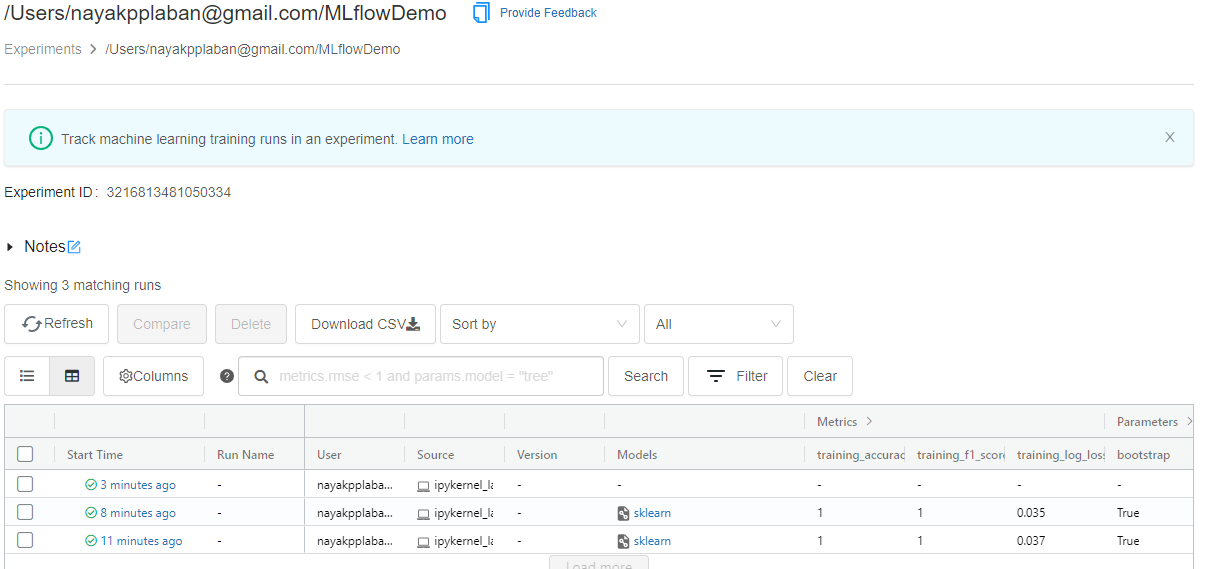

## Artifacts for XGBClassifier
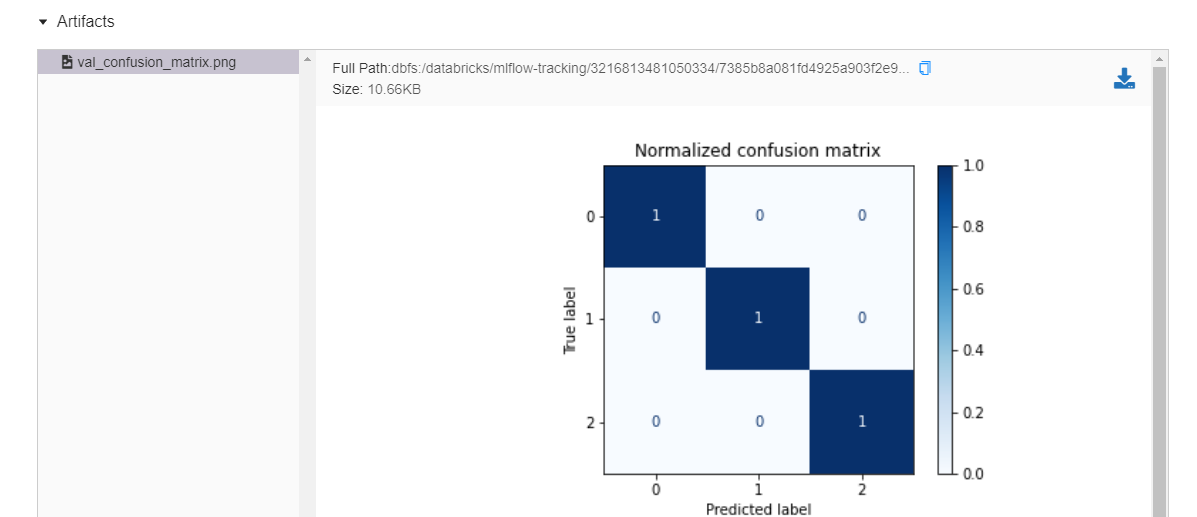

## Artifacts for RandomForestClassifier

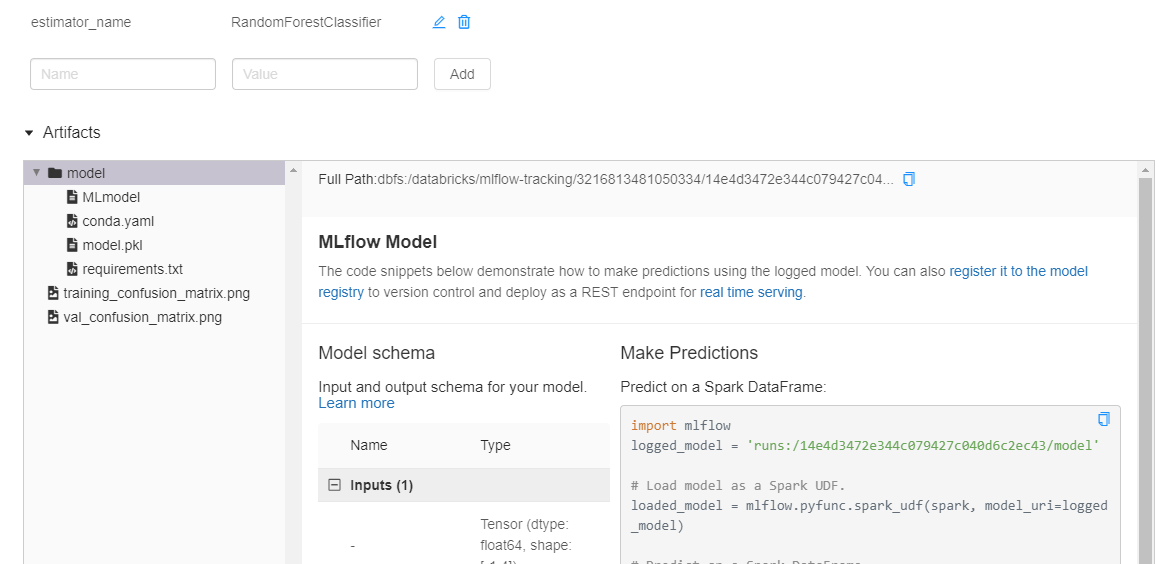

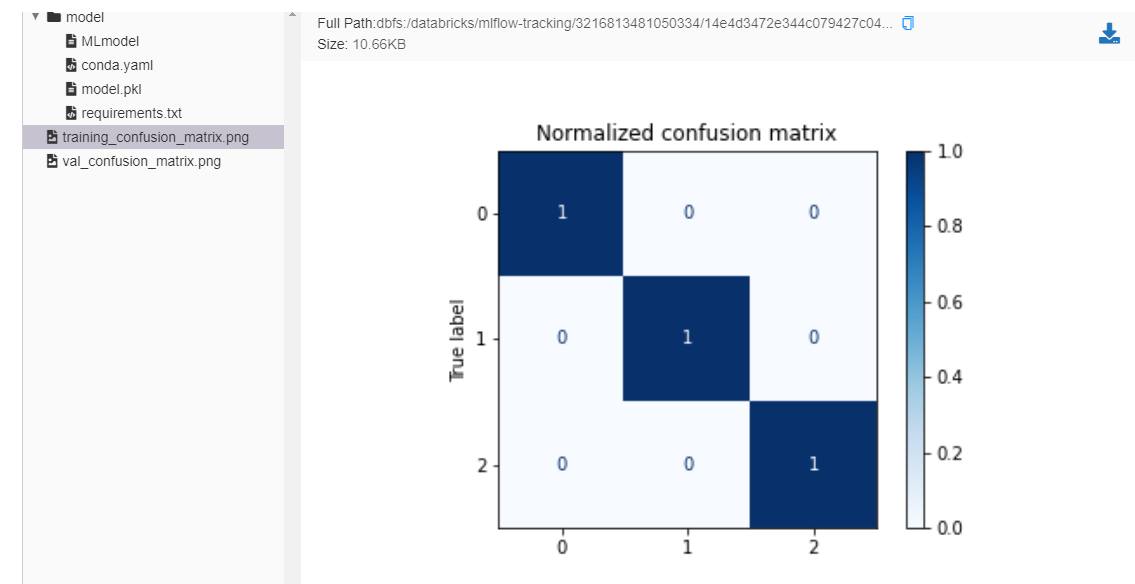

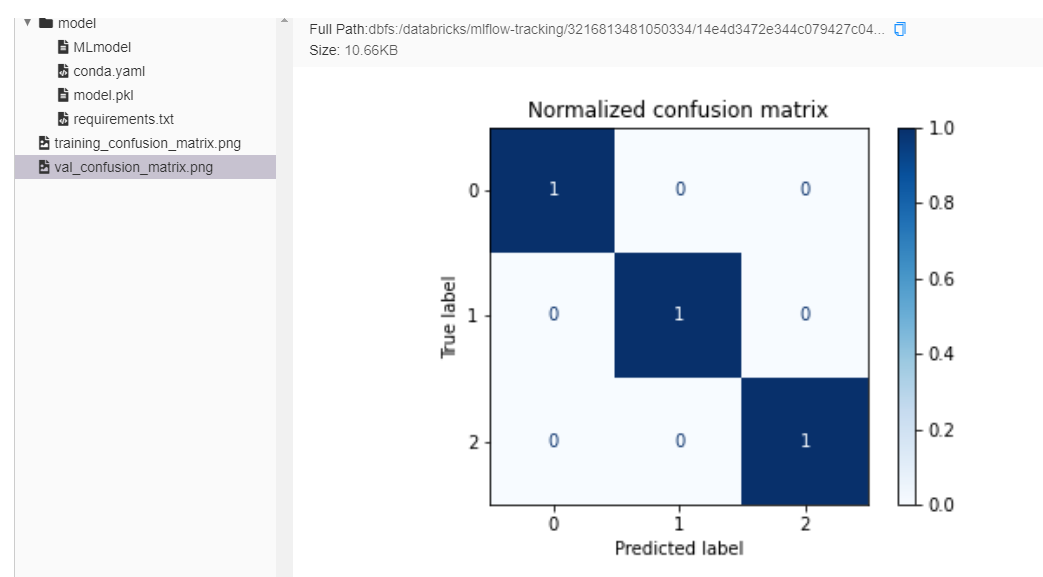

## XgboostClassifier- MlFlow

In [27]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss
import xgboost as xgb
import matplotlib as mpl


import mlflow
import mlflow.xgboost


# prepare train and test data
iris = datasets.load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# enable auto logging
mlflow.xgboost.autolog()

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

lr = float(input("learning rate to update step size at each boosting step (default: 0.3)"))
col_sample_rate = float(input("subsample ratio of columns when constructing each tree (default: 1.0)"))
subsample = float(input("subsample ratio of the training instances (default: 1.0)"))

#

with mlflow.start_run(nested=True):
        # log data parameters
        mlflow.log_param("dataset  Size", X.shape)
        mlflow.log_param("Feature list", X.columns)
        mlflow.log_param("test_size", X_test.shape)

        # train model
        params = {
            "objective": "multi:softprob",
            "num_class": 3,
            "learning_rate": lr,
            "eval_metric": "mlogloss",
            "colsample_bytree": col_sample_rate,
            "subsample": subsample,
            "seed": 42,
        }
        model = xgb.train(params, dtrain, evals=[(dtrain, "train")])

        # evaluate model
        y_proba = model.predict(dtest)
        y_pred = y_proba.argmax(axis=1)
        loss = log_loss(y_test, y_proba)
        acc = accuracy_score(y_test, y_pred)
        train_pred = model.predict(dtrain).argmax(axis=1)
        training_accuracy = accuracy_score(y_train,train_pred)

        # log metrics
        mlflow.log_metrics({"log_loss": loss,"training accuracy":training_accuracy ,"validation accuracy":acc,"accuracy": acc})


learning rate to update step size at each boosting step (default: 0.3)0.3
subsample ratio of columns when constructing each tree (default: 1.0)1.0
subsample ratio of the training instances (default: 1.0)1.0
[0]	train-mlogloss:0.747235
[1]	train-mlogloss:0.540598
[2]	train-mlogloss:0.40276
[3]	train-mlogloss:0.307892
[4]	train-mlogloss:0.240515
[5]	train-mlogloss:0.190865
[6]	train-mlogloss:0.154709
[7]	train-mlogloss:0.128068
[8]	train-mlogloss:0.107224
[9]	train-mlogloss:0.090534
